# <center> Homework4-IE7275-Group01 </center>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv
Saving wine_2class.csv to wine_2class.csv


In [218]:
# importing libraris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from tabulate import tabulate

# Question 1

## Model 1: Linear Regression

In [234]:
df_boston = pd.read_csv('BostonHousing.csv')
df_boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### a) Prevent collinearity by removing linearly dependent variables. For example, if 2 variables A and B have a Pearson correlation coefficient larger than 0.9, eliminate one to avoid redundancy.


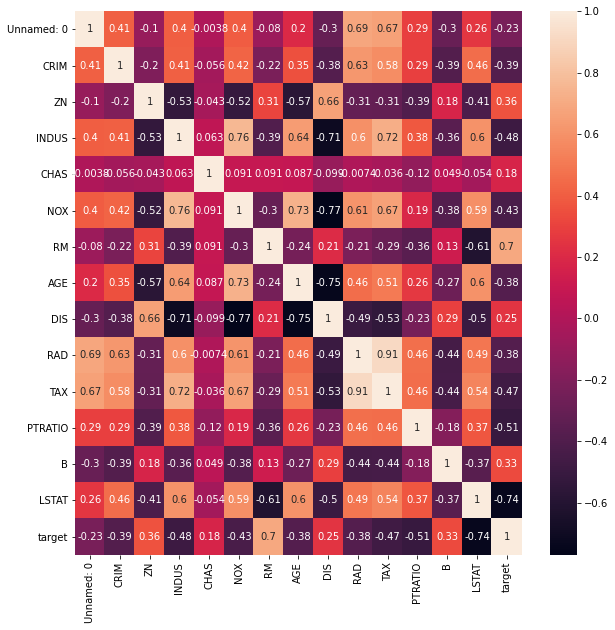

In [235]:
#Calculating Pearson correlation coefficient
plt.figure(figsize=[10,10])
sns.heatmap(df_boston.corr(method='pearson'), annot=True)

In [236]:
# Pearson Correlation Coefficient between RAD and TAX is larger than 0.9. One of the two variables can be removed to avoid redundancy
corr, _ = stats.pearsonr(df_boston['RAD'],df_boston['TAX'])
corr

0.9102281885331868

In [237]:
# Removing variable RAD
df_boston_updated = df_boston.drop('RAD', 1)
df_boston_updated

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


In [238]:
# Removing unnecessary columns ('Unnamed')
df_boston_updated = df_boston_updated.drop(['Unnamed: 0'], axis=1)
df_boston_updated

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


In [239]:
df_boston_updated.info() # Checking info
df_boston_updated.isna().sum() # Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  target   506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

### b) Partition the data into 75% training and 25% test set.

In [240]:
X_train, X_test, y_train, y_test = train_test_split(df_boston_updated.iloc[:, :-1],df_boston_updated.iloc[:,-1], test_size = 0.25, random_state = 0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,330.0,19.1,389.13,18.46
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,284.0,19.7,396.90,9.22
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,254.0,17.6,389.25,6.05
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,666.0,20.2,391.98,17.12
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,666.0,20.2,21.57,25.79
...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,233.0,17.9,392.74,18.80


### c) Now fit a linear regression model with all the features (after removing linearly dependent variables) on the training set with any Python package of your choice. Present the model summary (including coefficients and p-values). Evaluate the model performance on the test set with MAE and RMSE.

In [241]:
from sklearn.linear_model import LinearRegression
linear_regr = linear_model.LinearRegression()
linear_regr.fit(X_train, y_train)
print('R^2 Value: ', linear_regr.score(X_train, y_train))
print('Coefficients: ',linear_regr.coef_)
print('Intercept:', linear_regr.intercept_)
y_pred = linear_regr.predict(X_test)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE: ', metrics.mean_squared_error(y_test, y_pred, squared=False))

R^2 Value:  0.7628972435906698
Coefficients:  [-8.27068675e-02  3.85106426e-02 -7.59838289e-02  2.78611257e+00
 -1.27288459e+01  4.00561614e+00 -1.08764139e-02 -1.42523570e+00
 -9.00185032e-04 -8.90444348e-01  7.18601371e-03 -5.00914658e-01]
Intercept: 31.55663941563722
MAE:  3.783323667661201
RMSE:  5.637173114154895


In [242]:
import statsmodels.api as sm
X_train_val = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train_val).fit()
#Model Summary 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     98.14
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          1.98e-106
Time:                        02:18:49   Log-Likelihood:                -1107.6
No. Observations:                 379   AIC:                             2241.
Df Residuals:                     366   BIC:                             2292.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5566      5.517      5.720      0.000      20.708      42.406
CRIM          -0.0827      0.036     -2.272      0.024      -0.154      -0.011
ZN             0.0385      0.015      2.548      0.011       0.009       0.068
INDUS         -0.0760      0.064     -1.185      0.237      -0.202       0.050
CHAS           2.7861      0.967      2.880      0.004       0.884       4.688
NOX          -12.7288      4.300     -2.960      0.003     -21.185      -4.273
RM             4.0056      0.473      8.468      0.000       3.075       4.936
AGE           -0.0109      0.015     -0.722      0.471      -0.041       0.019
DIS           -1.4252      0.227     -6.274      0.000      -1.872      -0.979
TAX           -0.0009      0.003     -0.346      0.730      -0.006       0.004
PTRATIO       -0.8904      0.144     -6.179      0.000      -1.174      -0.607
B              0.0072      0.003      2.355      0.019       0.001       0.013
LSTAT         -0.5009      0.058     -8.584      0.000      -0.616      -0.386
==============================================================================
Omnibus:                      151.066   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.366
Skew:                           1.629   Prob(JB):                    1.29e-170
Kurtosis:                       9.239   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### d) Fit a LASSO and ridge linear regression model on the training set with a package of your choice. Evaluate the model performance on the test set with MAE and RMSE. Compare the performance with the full model above.

In [243]:
from sklearn import linear_model

# Lasso Regression
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
print('R^2 Value: ', lasso.score(X_train, y_train))
print('Coefficients: ',lasso.coef_)
print('Intercept:', lasso.intercept_)

# Model Performance for Lasso regrssion
pred_lasso = lasso.predict(X_test)
print('MAE: ', mean_absolute_error(y_test,pred_lasso))
print('RMSE: ', mean_squared_error(y_test,pred_lasso, squared = False))

R^2 Value:  0.754955235299483
Coefficients:  [-7.98496074e-02  4.15838092e-02 -1.03894997e-01  1.10793433e+00
 -0.00000000e+00  3.81447521e+00 -1.86899020e-02 -1.20294678e+00
 -3.76739561e-03 -7.71812240e-01  8.15248664e-03 -5.36446098e-01]
Intercept: 24.815875589302077
MAE:  3.8553604426641606
RMSE:  5.803023974828302


In [244]:
# Ridge linear regression
ridge = linear_model.Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
print('R^2 Value: ', ridge.score(X_train, y_train))
print('Coefficients: ',ridge.coef_)
print('Intercept:', ridge.intercept_)

# Model Performance for Ridge linear regression
pred_ridge = ridge.predict(X_test)
print('MAE: ', mean_absolute_error(y_test,pred_ridge))
print('RMSE: ', mean_squared_error(y_test,pred_ridge, squared = False))

R^2 Value:  0.7628596767540783
Coefficients:  [-8.27803855e-02  3.87834774e-02 -7.92504808e-02  2.76987087e+00
 -1.16953653e+01  4.00910971e+00 -1.18773393e-02 -1.41124619e+00
 -1.11161427e-03 -8.79980776e-01  7.25733194e-03 -5.01977936e-01]
Intercept: 30.889524612819308
MAE:  3.781955668848347
RMSE:  5.644215206512603


Performance (MAE and RMSE) of both the model remains the same.

### e) Perform 5-fold cross-validation on the above data and report avg. MAE and avg. RMSE for linear regression, LASSO regression, and ridge regression.

In [245]:
X = df_boston_updated.iloc[:,:-1] 
y = df_boston_updated.iloc[:,-1]

In [252]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

# Cross validation for Linear Regression
lr_mae = cross_val_score(linear_regr, X, y, scoring='neg_mean_absolute_error', cv=5)
lr_rmse = cross_val_score(linear_regr, X, y, scoring='neg_root_mean_squared_error', cv=5)

print('Cross Validation: ',cross_val_score(linear_regr,X,y,cv=5))

# Average of MAE and RMSE
print('MAE:' ,mean(absolute(lr_mae)))
print('RMSE:',mean(absolute(lr_rmse)))

Cross Validation:  [0.63138069 0.72522601 0.57281692 0.03453436 0.20012681]
MAE: 4.046921992528987
RMSE: 5.6464955916404636


In [253]:
#Cross validation for Lasso Regression
lasso_mae = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=5)
lasso_rmse = cross_val_score(lasso, X, y, scoring='neg_root_mean_squared_error', cv=5)

print('Cross Validation: ',cross_val_score(lasso,X,y,cv=5))

#Average of MAE and RMSE
print('MAE:' ,mean(absolute(lasso_mae)))
print('RMSE: ',mean(absolute(lasso_rmse)))

Cross Validation:  [0.66622792 0.71743876 0.59783635 0.0558123  0.19785932]
MAE: 3.911845959872833
RMSE:  5.572142514732351


In [254]:
#Cross validation for Ridge Regression
cv_mae = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=5)
cv_rmse = cross_val_score(ridge, X, y, scoring='neg_root_mean_squared_error', cv=5)

print('Cross Validation: ',cross_val_score(ridge,X,y,cv=5))

#Average of RMSE and MAE
print('MAE: ' ,mean(absolute(cv_mae)))
print('RMSE: ',mean(absolute(cv_rmse)))

Cross Validation:  [0.63494169 0.72794192 0.57879261 0.03593812 0.20268768]
MAE:  4.020466852812264
RMSE:  5.627057648781286


### f) Partition the data into 75% training and 25% test set. Perform LASSO regression on the training set. Vary alpha value in LASSO regression (alpha = 0.1, 0.3, 0.6, 1, 1.5, 2). Report the MAE and RMSE for all the alpha values. Also report the model weights for different alpha values.

In [255]:
alpha_values = [0.1,0.3,0.6,1,1.5,2]

for i in alpha_values:
  print('\nLasso Regression for alpha value: ', i)
  la = linear_model.Lasso(alpha=i)
  la.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  print('\nR^2 Value: ', la.score(X_train, y_train))
  print('Coefficients: ',la.coef_)
  print('Intercept: ', la.intercept_)
  pred_la = la.predict(X_test)
  print('MAE: ', mean_absolute_error(y_test,pred_la))
  print('RMSE: ', mean_squared_error(y_test,pred_la, squared = False))


Lasso Regression for alpha value:  0.1

R^2 Value:  0.754955235299483
Coefficients:  [-7.98496074e-02  4.15838092e-02 -1.03894997e-01  1.10793433e+00
 -0.00000000e+00  3.81447521e+00 -1.86899020e-02 -1.20294678e+00
 -3.76739561e-03 -7.71812240e-01  8.15248664e-03 -5.36446098e-01]
Intercept:  24.815875589302077
MAE:  3.8553604426641606
RMSE:  5.803023974828302

Lasso Regression for alpha value:  0.3

R^2 Value:  0.7480741651023048
Coefficients:  [-0.06955962  0.04221872 -0.08858882  0.         -0.          3.19231055
 -0.00970171 -1.09336033 -0.00416023 -0.77632379  0.00783561 -0.5859364 ]
Intercept:  28.54837172032624
MAE:  3.8803811728532094
RMSE:  5.8719374971050105

Lasso Regression for alpha value:  0.6

R^2 Value:  0.7365568010619414
Coefficients:  [-0.05275619  0.04334445 -0.07227603  0.         -0.          2.22952172
  0.         -0.93865799 -0.00461473 -0.76721933  0.00703921 -0.65322081]
Intercept:  34.2675793431354
MAE:  3.975873932756061
RMSE:  5.971895149236454

Lasso Reg

## Model 2: k-NN

### a) Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? If so, rescale the data.

Since our dataset has distance, the algorithms like kNN are affected by the scale of the variables. This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

In [256]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df_boston_scaled = df_boston_updated.iloc[:,:]
scaler = StandardScaler()
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']
df_boston_scaled[features] = scaler.fit_transform(df_boston_scaled[features])
df_boston_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.803212,1.176466,0.403225,-0.865302,22.0


### b) Partition the data into 75% training and 25% test set.

In [257]:
X_train, X_test, y_train, y_test = train_test_split(df_boston_scaled.iloc[:,:-1], df_boston_scaled.iloc[:,-1], test_size=0.25, random_state=0)

### c) Build a KNN regressor from scratch (do not use any package such as sklearn or stat models). Fit it on the training set. Choose the best k from 1-20 based on the RMSE of different k values on the test set. Explain the reason for your choice

In [258]:
# Calculating Eucledian Distance
def euclidean(x,x_train):          
    return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Predict Function 
def predict(X, y , x_input, k):
    val = []
    for item in x_input: 
        distances = []                     
        for j in range(len(X)): 
            distances.append(eucledian(np.array(X[j,:]) , item)) 
        distances = np.array(distances) 
        val.append(np.mean(y[np.argsort(distances)[:k]]))
    return val

# Creating a new dataframe to store K and RMSE values
df_kNN = pd.DataFrame()

for i in range(1,21):
  y_pred = predict(X=np.array(X_train),y=np.array(y_train), x_input = np.array(X_test) , k=i)
  rms = rmse(y_pred,y_test)
  df_kNN.loc[i,0] = i
  df_kNN.loc[i,1] = rms

# Calculating RMSE
def rmse(predictions, targets):
  return np.sqrt(np.square(predictions - targets).mean())

# Calculating MAE
def mae(predictions, targets):
  return abs(predictions - targets).mean()

df_kNN.columns = ['k','RMSE']
df_kNN

,k,RMSE
1,1.0,5.343692
2,2.0,5.099058
3,3.0,5.496142
4,4.0,5.540352
5,5.0,5.486473
6,6.0,5.463565
7,7.0,5.516396
8,8.0,5.611169
9,9.0,5.707458
10,10.0,5.719997


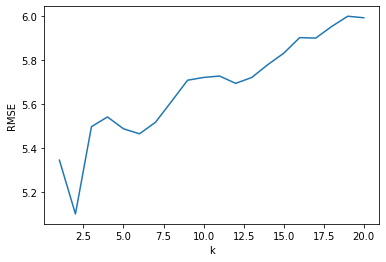

In [259]:
sns.lineplot(x='k',y='RMSE', data = df_kNN)

### d) Score the test set with the best k. Comment on the model performance.

In [260]:
y_pred = predict(X=np.array(X_train),y=np.array(y_train), x_input = np.array(X_test) , k=2)
rms = rmse(y_pred,y_test)
rms

5.099058118985054

As we can see that with k=2, we have the lowest value of RMSE. So model performance seems to be better with k=2 neghbours.

# Question 2

### a) Preprocess the data if necessary. Partition the data into 75% training and 25% test set.

In [267]:
df_wine = pd.read_csv('wine_2class.csv')
df_wine

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [268]:
df_wine=df_wine.drop(['Unnamed: 0'], axis=1)
df_wine.isna().sum()
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(df_wine.iloc[:,:-1], df_wine.iloc[:,-1], test_size=0.25)

### b) Choose the best k from 1-20 based on the overall classification accuracy of different k values on the test set.

Best performing model
+----+-----+------------+
|    |   k |   Accuracy |
|----+-----+------------|
|  4 |   4 |   0.939394 |
+----+-----+------------+
All results
+----+-----+------------+
|    |   k |   Accuracy |
|----+-----+------------|
|  1 |   1 |   0.909091 |
|  2 |   2 |   0.909091 |
|  3 |   3 |   0.909091 |
|  4 |   4 |   0.939394 |
|  5 |   5 |   0.878788 |
|  6 |   6 |   0.909091 |
|  7 |   7 |   0.878788 |
|  8 |   8 |   0.909091 |
|  9 |   9 |   0.909091 |
| 10 |  10 |   0.909091 |
| 11 |  11 |   0.878788 |
| 12 |  12 |   0.878788 |
| 13 |  13 |   0.848485 |
| 14 |  14 |   0.848485 |
| 15 |  15 |   0.848485 |
| 16 |  16 |   0.848485 |
| 17 |  17 |   0.848485 |
| 18 |  18 |   0.848485 |
| 19 |  19 |   0.848485 |
| 20 |  20 |   0.848485 |
+----+-----+------------+


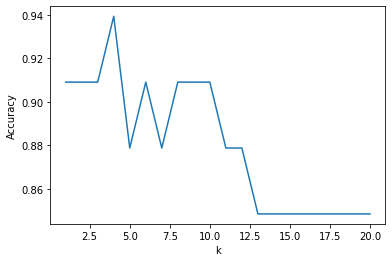

In [269]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = np.empty(20)
df_results = pd.DataFrame(columns = ['k', 'Accuracy'])
for i in range(1, 21):
  kNN_classifier = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  kNN_classifier.fit(X_train_wine, y_train_wine)
  pred_value = kNN_classifier.predict(X_test_wine)
  k = i
  accuracy = accuracy_score(y_test_wine, pred_value)
  df_results.loc[i] = [k, accuracy]

print('Best performing model')      
print(tabulate(df_results[df_results['Accuracy'] == df_results['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))

sns.lineplot(x = 'k', y = 'Accuracy', data = df_results)

### c) Score the following record using the chosen k.

In [270]:
kNN_classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
kNN_classifier.fit(X_train_wine, y_train_wine)
score_pred = kNN_classifier.predict([[14.12, 1.88, 2.31, 18.5, 125, 2.5, 3.12, 0.26, 2.12, 4.87, 1.02, 3.23, 955]])
print(score_pred[0])

0
